In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import nltk
nltk.download('stopwords')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
!python3 -m spacy download en

    100% |████████████████████████████████| 37.4MB 21.3MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
!ls "/content/drive/Team Drives/Machine Learning/data/"

restaurant.csv	yelp_business.csv


In [0]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [0]:
restaurants = pd.read_csv("/content/drive/Team Drives/Machine Learning/data/restaurant.csv").sample(10000) #use only a sample of 10000 reviews
reviews = restaurants['text'] #keep only reviews

In [0]:
#Tokenization and Cleaning

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [0]:
data_words = list(sent_to_words(reviews))

#Creating Bigram and Trigram Models

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['from', 'stars', 'to', 'stars', 'to', 'star', 'ulta', 'your', 'salon', 'service', 'today', 'was', 'absolutely', 'disappointing', 'here', 'is', 'why', 'ulta', 'failed', 'in', 'customer', 'service', 'today', 'made', 'an', 'appointment', 'on', 'wednesday', 'my', 'stylist', 'called', 'to', 'cancel', 'the', 'day', 'before', 'not', 'the', 'worst', 'thing', 'in', 'the', 'world', 'so', 'made', 'an', 'appointment', 'for', 'saturday', 'at', 'instead', 'for', 'cut', 'and', 'color', 'there', 'is', 'supposed', 'to', 'be', 'note', 'that', 'the', 'stylist', 'only', 'works', 'with', 'me', 'and', 'not', 'other', 'clients', 'at', 'the', 'exact', 'same', 'time', 'but', 'guess', 'no', 'one', 'read', 'my', 'notes', 'because', 'tiffani', 'was', 'late', 'to', 'see', 'me', 'and', 'then', 'worked', 'on', 'another', 'customer', 'while', 'doing', 'my', 'hair', 'asked', 'tiffani', 'to', 'trim', 'my', 'current', 'hairstyle', 'and', 'make', 'my', 'dark_brown', 'hair', 'shade', 'lighter', 'also', 'told', 'her', 'th

In [0]:
#Remove Stopwords, Make Bigrams and Lemmatize

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatizing(text):
    #text = [wn.lemmatize(word) for word in tokenized_text]
    #return text
    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

spacy.load('en')
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['star', 'star', 'star', 'ulta', 'salon', 'service', 'today', 'absolutely', 'disappointing', 'ulta', 'fail', 'customer', 'service', 'today', 'make', 'appointment', 'wednesday', 'stylist', 'call', 'cancel', 'day', 'bad', 'thing', 'world', 'make', 'appointment', 'saturday', 'instead', 'cut', 'color', 'suppose', 'note', 'stylist', 'work', 'client', 'exact', 'time', 'guess', 'read', 'note', 'tiffani', 'late', 'see', 'work', 'customer', 'hair', 'ask', 'tiffani', 'trim', 'current', 'hairstyle', 'make', 'dark_brown', 'hair', 'shade', 'lighter', 'also', 'tell', 'leave', 'salon', 'family', 'event', 'say', 'hair', 'get', 'light', 'use', 'permanent', 'color', 'even', 'would', 'lift', 'would', 'shade', 'say', 'perfect', 'love', 'color', 'want', 'tiny', 'bit', 'light', 'figure', 'would', 'easy', 'appointment', 'quick', 'trim', 'basically', 'keep', 'exact', 'hair', 'color', 'wrong', 'put', 'color', 'hair', 'tiffani', 'say', 'would', 'back', 'minute', 'wish', 'would', 'tell', 'long', 'color', 'would

In [0]:
#Create the Dictionary and Corpus needed for Topic Modeling

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 2), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 10), (23, 3), (24, 1), (25, 1), (26, 3), (27, 1), (28, 6), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 4), (59, 2), (60, 2), (61, 15), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 2), (75, 1), (76, 2), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 3), (83, 3), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 1), (98, 4), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 1), (105, 3), (106, 4), (107, 1), (108, 1), (109, 4), (110, 

In [0]:
#Build topic model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
#View the topics in LDA model
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"ice_cream" + 0.023*"favorite" + 0.023*"taste" + 0.022*"flavor" + '
  '0.017*"delicious" + 0.015*"cake" + 0.015*"donut" + 0.013*"chocolate" + '
  '0.010*"und" + 0.009*"fresh"'),
 (1,
  '0.058*"room" + 0.031*"hotel" + 0.029*"show" + 0.029*"stay" + 0.026*"night" '
  '+ 0.022*"pool" + 0.018*"vegas" + 0.014*"check" + 0.013*"water" + '
  '0.012*"bed"'),
 (2,
  '0.049*"great" + 0.036*"staff" + 0.029*"always" + 0.026*"friendly" + '
  '0.025*"feel" + 0.022*"love" + 0.020*"clean" + 0.019*"make" + '
  '0.018*"amazing" + 0.018*"work"'),
 (3,
  '0.019*"hold" + 0.018*"foot" + 0.015*"agree" + 0.014*"glass" + 0.014*"truck" '
  '+ 0.013*"clearly" + 0.013*"pedicure" + 0.013*"totally" + 0.011*"unique" + '
  '0.010*"correct"'),
 (4,
  '0.030*"dress" + 0.017*"simply" + 0.017*"worker" + 0.016*"road" + '
  '0.016*"airport" + 0.015*"impressed" + 0.013*"enterprise" + 0.011*"bike" + '
  '0.010*"charlotte" + 0.009*"direct"'),
 (5,
  '0.037*"professional" + 0.029*"dog" + 0.019*"almost" + 0.016*"bat

In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.053132747319466

Coherence Score:  0.3765287167608924


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      35.112568        1       1  0.327523 -0.085288
12     14.883397        1       2  0.245993  0.250454
2       9.879327        1       3  0.219610 -0.063625
1       6.918111        1       4  0.070996  0.196809
8       6.392989        1       5  0.114551 -0.302895
9       5.207105        1       6 -0.076923  0.007256
10      3.718465        1       7 -0.086623  0.035077
6       3.304058        1       8 -0.096629  0.006811
5       3.223578        1       9 -0.102872 -0.024052
0       2.654700        1      10 -0.111741  0.018942
13      2.631560        1      11 -0.118703  0.003663
3       2.361875        1      12 -0.126593 -0.012973
11      2.360036        1      13 -0.117275 -0.023041
4       1.352223        1      14 -0.141316 -0.007137, topic_info=      Category         Freq            Term        Total  loglift  logprob
term                                                                      
341    Default  4682.000000            good  4682.000000  30.0000  30.0000
489    Default  4221.000000           place  4221.000000  29.0000  29.0000
58     Default  7170.000000             get  7170.000000  28.0000  28.0000
59     Default  6638.000000              go  6638.000000  27.0000  27.0000
243    Default  3790.000000           great  3790.000000  26.0000  26.0000
256    Default  2164.000000            room  2164.000000  25.0000  25.0000
16     Default  2078.000000            call  2078.000000  24.0000  24.0000
135    Default  4896.000000            time  4896.000000  23.0000  23.0000
564    Default  1919.000000           staff  1919.000000  22.0000  22.0000
103    Default  2433.000000          really  2433.000000  21.0000  21.0000
131    Default  2062.000000            tell  2062.000000  20.0000  20.0000
3      Default  2350.000000            also  2350.000000  19.0000  19.0000
23     Default  3399.000000            come  3399.000000  18.0000  18.0000
161    Default  1583.000000          always  1583.000000  17.0000  17.0000
82     Default  3287.000000            make  3287.000000  16.0000  16.0000
253    Default  1799.000000           price  1799.000000  15.0000  15.0000
575    Default  1444.000000        friendly  1444.000000  14.0000  14.0000
268    Default  1704.000000            feel  1704.000000  13.0000  13.0000
157    Default  3651.000000           would  3651.000000  12.0000  12.0000
80     Default  2038.000000            love  2038.000000  11.0000  11.0000
92     Default  2009.000000            nice  2009.000000  10.0000  10.0000
526    Default   943.000000           drink   943.000000   9.0000   9.0000
216    Default  1150.000000           hotel  1150.000000   8.0000   8.0000
61     Default   836.000000            hair   836.000000   7.0000   7.0000
129    Default  3026.000000            take  3026.000000   6.0000   6.0000
116    Default  3215.000000         service  3215.000000   5.0000   5.0000
155    Default  2600.000000            work  2600.000000   4.0000   4.0000
1473   Default  1067.000000            stay  1067.000000   3.0000   3.0000
385    Default  1467.000000           store  1467.000000   2.0000   2.0000
1499   Default   813.000000         awesome   813.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
577    Topic14   127.723778          simply   128.590134   4.2967  -4.0463
2437   Topic14   126.039604          worker   126.905960   4.2966  -4.0596
229    Topic14   117.246292            road   118.112648   4.2961  -4.1319
200    Topic14   113.696198         airport   114.562546   4.2958  -4.1626
182    Topic14   113.173164       impressed   114.039520   4.2958  -4.1672
6524   Topic14    92.530037      enterprise    93.396400   4.2941  -4.3686
2904   Topic14    81.798439            bike    82.664787   4.2929  -4.4919
1611   Topic14    73.622467       charlotte    74.488823   4.2917  -4.5972
1356   Topic14    

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, 
                                                chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

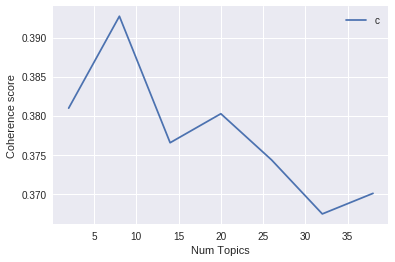

In [0]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.026*"ice_cream" + 0.023*"favorite" + 0.023*"taste" + 0.022*"flavor" + '
  '0.017*"delicious" + 0.015*"cake" + 0.015*"donut" + 0.013*"chocolate" + '
  '0.010*"und" + 0.009*"fresh"'),
 (1,
  '0.058*"room" + 0.031*"hotel" + 0.029*"show" + 0.029*"stay" + 0.026*"night" '
  '+ 0.022*"pool" + 0.018*"vegas" + 0.014*"check" + 0.013*"water" + '
  '0.012*"bed"'),
 (2,
  '0.049*"great" + 0.036*"staff" + 0.029*"always" + 0.026*"friendly" + '
  '0.025*"feel" + 0.022*"love" + 0.020*"clean" + 0.019*"make" + '
  '0.018*"amazing" + 0.018*"work"'),
 (3,
  '0.019*"hold" + 0.018*"foot" + 0.015*"agree" + 0.014*"glass" + 0.014*"truck" '
  '+ 0.013*"clearly" + 0.013*"pedicure" + 0.013*"totally" + 0.011*"unique" + '
  '0.010*"correct"'),
 (4,
  '0.030*"dress" + 0.017*"simply" + 0.017*"worker" + 0.016*"road" + '
  '0.016*"airport" + 0.015*"impressed" + 0.013*"enterprise" + 0.011*"bike" + '
  '0.010*"charlotte" + 0.009*"direct"'),
 (5,
  '0.037*"professional" + 0.029*"dog" + 0.019*"almost" + 0.016*"bat

In [0]:
data = restaurants.text.values.tolist()

In [0]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [0]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.5138,"get, go, time, would, come, take, say, service...","From 4 stars to 3 stars to 1 star. Ulta, your ..."
1,1,0.0,0.4435,"ice_cream, favorite, taste, flavor, delicious,...",My co-workers brought in some cupcakes for my ...
2,2,8.0,0.3857,"call, tell, company, charge, manager, month, f...",This company is the biggest rip off I have eve...
3,3,7.0,0.3802,"get, go, time, would, come, take, say, service...",Fifty stars!!!! Wow! Spilled water and splas...
4,4,2.0,0.3791,"great, staff, always, friendly, feel, love, cl...",Peggy is wonderful! So knowledgeable and makes...
5,5,7.0,0.5167,"get, go, time, would, come, take, say, service...","I walked in on a Monday, they had no customers..."
6,6,7.0,0.4110,"get, go, time, would, come, take, say, service...",I went to EMG today for my second haircut of t...
7,7,7.0,0.2664,"get, go, time, would, come, take, say, service...",Visited store on 3rd July 2014. Still no scoot...
8,8,7.0,0.4923,"get, go, time, would, come, take, say, service...",I posted a review last year and nothing has ch...
9,9,7.0,0.3862,"get, go, time, would, come, take, say, service...","When it comes to gaming, I seriously don't buy..."
